In [384]:
## packages
# coding: utf-8
import os
import random
import numpy as np  
import json
import copy
from collections import defaultdict
from collections import Counter

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical, plot_model


from keras import backend as K
from keras.optimizers import Adam,SGD
from keras.utils import to_categorical, plot_model
from keras.models import Sequential, Model, load_model
from keras.layers import multiply,Flatten,Permute,Embedding, Dense, Input, Dropout, Reshape, BatchNormalization, TimeDistributed, Lambda, Layer, LSTM, Bidirectional, Average, concatenate
import matplotlib.pyplot as plt

#from attention_utils import get_activations, get_data

#from LSTM.NonMasking import *

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [385]:
random.seed(10)

In [394]:
# data
with open("/Users/lina/desktop/CAPSTONE/script_manager/server/patient_history_dict.json","r") as f:
    patient_history_dict = json.load(f)
print ("size of dict:",len(patient_history_dict))


size of dict: 8339


In [119]:
i =0
for item in patient_history_dict:
    print (item ,patient_history_dict.get(item))
    print (set(patient_history_dict.get(item))) #不能直接set 会改变顺序
    if i > 5:
        break
    i += 1

738e9e2a5fc85819e5cf54c3f2061fe5f90c559e [4, 4, 4, 4, 4]
{4}
797b2ce3062e296435d8c8cc1f2061e362fc53df [4, 165, 185, 205, 165, 185, 205, 282, 4, 4, 346]
{4, 165, 205, 346, 185, 282}
1ba0b6197f1f2abe692bc8b6eb4c562537449407 [282, 282, 282, 282, 165, 185, 205, 282, 282, 282, 104, 282, 282, 282, 282]
{165, 104, 205, 185, 282}
c68cbe04e3e4585ca623a3a70217daabd56f3d8b [298, 364, 29, 412, 298, 364, 29, 412, 298, 364, 29, 412, 298, 364, 29, 412, 298, 364, 29, 412, 298, 364, 29, 412, 298, 364, 29, 412, 298, 364, 29, 412, 298, 364, 29, 412, 298, 364, 29, 412, 298, 364, 29, 412, 274, 125, 144, 298, 364, 29, 412, 298, 364, 29, 412, 298, 364, 29, 412, 298, 364, 29, 412, 298, 364, 29, 412, 298, 364, 29, 412, 298, 364, 29, 412, 165, 185, 205, 19, 273, 298, 364, 29, 412, 210, 311, 298, 364, 29, 412, 298, 364, 29, 412, 274, 125, 144, 298, 364, 29]
{165, 298, 364, 205, 144, 273, 274, 19, 210, 125, 311, 185, 412, 29}
c677978e921dfbed8a0d9a0201c54709b97e178f [159, 349, 370, 319, 118, 293, 68, 245, 159, 34

In [396]:
# load medicine dict
with open("/Users/lina/desktop/CAPSTONE/script_manager/server/disease_dic.json","r") as f:
    disease_dict = json.load(f)
print ("size of dict:",len(disease_dict))


size of dict: 420


# preprocess data
* a single history sequence without repilicated medicien for a patient
* several sequence  for a patient



### a single history sequence without repilicated medicien for a patient -- dict


In [397]:
# a single sequence without repilicated medicien for a patient

no_repeat_history_dict=defaultdict(list)

i =0
for pa_id in patient_history_dict:
    #print (pa_id ,patient_history_dict.get(pa_id))
    for med in patient_history_dict.get(pa_id):
        if med not in no_repeat_history_dict[pa_id]:
            no_repeat_history_dict[pa_id].append(med)
    #print(pa_id, no_repeat_history_dict[pa_id])
    '''
    if i > 5:
        break
    i += 1
    '''
print("size of no_repeat_history_dict: ",len(no_repeat_history_dict))
#print(no_repeat_history_dict)
for pa_id in no_repeat_history_dict:
    print (pa_id, no_repeat_history_dict.get(pa_id))
    break

size of no_repeat_history_dict:  8339
738e9e2a5fc85819e5cf54c3f2061fe5f90c559e [4]


In [121]:
# save to json
with open("/Users/lina/desktop/CAPSTONE/data/no_repeat_patient_history_dict.json","w") as f:
    json.dump(no_repeat_history_dict,f)


### several history sequences for a patient -- 3D list
* each patient
* each sublist
* each medicien


In [360]:
# save to json
with open("/Users/lina/desktop/CAPSTONE/data/no_repeat_patient_history_new.json","r") as f:
    no_repeat_history_dict = json.load(f)

print(len(no_repeat_history_dict))

8305


In [399]:
i =0
complete_list=[]
for pa_id in no_repeat_history_dict:
    #print (pa_id,no_repeat_history_dict.get(pa_id) )
    temp_list_pa_id =[]
    temp_sublist =[]
    for med in no_repeat_history_dict.get(pa_id):
        if temp_list_pa_id:
            temp_sublist =copy.deepcopy(temp_list_pa_id[-1])
        temp_sublist.append(med)
        temp_list_pa_id.append(temp_sublist)
    complete_list.append((temp_list_pa_id))
    #print(complete_list)
    
    i+=1
    if i == 2:
        print(total_list)


        
print(len(complete_list))
    
        

[[[3]], [[3], [3, 164], [3, 164, 184], [3, 164, 184, 204], [3, 164, 184, 204, 281], [3, 164, 184, 204, 281, 345]], [[281], [281, 164], [281, 164, 184], [281, 164, 184, 204], [281, 164, 184, 204, 103]]]
8339


In [362]:
#save to json
save_dict={}
save_dict["list"]=complete_list
with open("/Users/lina/desktop/CAPSTONE/data/sublist_dict_new.json","w") as f:
    json.dump(save_dict,f)
print(len(save_dict["list"]))
    

8305


In [368]:
print(len(sublist_temp.get("list")))

8339


## trainning data

In [400]:
# set time stemps
time_stamps = 10


In [401]:
min_his_lim=2  #如果history小于3条的就不用了
record_len_x =[]
def modify_XY(history_list, time_stamps):
    sample_x=[]
    sample_y=[]
    for pa_id in history_list:
        for med_history in pa_id:
            if len(med_history)>2:
                record_len_x.append(len(med_history)-1)
                sample_x.append(med_history[0:-1])
                sample_y.append(med_history[-1])
            

    sample_x = pad_sequences(sample_x, time_stamps)
    
    state = np.random.get_state()
    np.random.shuffle(sample_x)
    np.random.set_state(state)
    np.random.shuffle(sample_y)
    np.random.set_state(state)
    np.random.shuffle(record_len_x)


    return sample_x, sample_y,record_len_x
 


In [402]:
sample_x, sample_y,record_len_x = modify_XY(complete_list,time_stamps)
print(len(sample_x),len(sample_y),len(record_len_x))

47510 47510 47510


In [403]:
print(len(record_len_x))
print(np.median(record_len_x))
print(np.mean(record_len_x))
len_sat = Counter()
for i in record_len_x:
    len_sat.update([str(i)])
print (len_sat)

47510
6.0
7.419427488949695
Counter({'2': 6718, '3': 5812, '4': 5095, '5': 4435, '6': 3878, '7': 3356, '8': 2880, '9': 2476, '10': 2132, '11': 1805, '12': 1530, '13': 1294, '14': 1090, '15': 917, '16': 759, '17': 626, '18': 518, '19': 423, '20': 352, '21': 294, '22': 237, '23': 193, '24': 158, '25': 129, '26': 105, '27': 78, '28': 56, '29': 42, '30': 33, '31': 26, '32': 16, '33': 13, '34': 11, '35': 7, '36': 4, '37': 4, '38': 3, '40': 2, '39': 2, '41': 1})



### one hot

In [1]:
#print(disease_dict)

In [164]:
""""
def one_hot_code(x_list,y_list,refer_dict):
    embedding_dim = len(refer_dict)+1 # index from 1
    encoded_X =[]
    for item in x_list:    
        temp= to_categorical(item,embedding_dim)
        encoded_X.append(temp)
    encoded_Y = to_categorical(y_list,embedding_dim)
    print("one_hot_code: ",len(encoded_X),len(encoded_Y))    
    return encoded_X,encoded_Y

In [407]:
def one_hot_code(x_list,y_list,refer_dict):
    embedding_dim = len(refer_dict)+1 # index from 1
    encoded_X = to_categorical(x_list,embedding_dim)
    encoded_Y = to_categorical(y_list,embedding_dim)
    print("one_hot_code: ",encoded_X.shape,encoded_Y.shape)    
    return encoded_X,encoded_Y

In [408]:
encoded_X,encoded_Y = one_hot_code(sample_x,sample_y,disease_dict)


one_hot_code:  (47510, 10, 421) (47510, 421)


In [2]:
#encoded_X[0]

In [3]:
#encoded_X[0][0]

In [409]:
# single function to get final train data
def get_train_data(n):
    sample_x, sample_y,record_len_x = modify_XY(complete_list,time_stamps)
    encoded_X,encoded_Y = one_hot_code(sample_x,sample_y,disease_dict)
    
    train_X = encoded_X [:-n]
    train_Y = encoded_Y [:-n]
    
    test_X = encoded_X [-n:] 
    test_Y = encoded_Y [-n:]  
    return [train_X,train_Y],[test_X,test_Y]



    

# Functions


In [410]:
def get_activations(model, inputs, print_shape_only=False, layer_name=None):
    # Documentation is available online on Github at the address below.
    # From: https://github.com/philipperemy/keras-visualize-activations
    print('----- activations -----')
    activations = []
    inp = model.input
    if layer_name is None:
        outputs = [layer.output for layer in model.layers]
    else:
        outputs = [layer.output for layer in model.layers if layer.name == layer_name]  # all layer outputs
    funcs = [K.function([inp] + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions
    layer_outputs = [func([inputs, 1.])[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

def get_data_recurrent(n, time_steps, input_dim, attention_column=8):
    """
    Data generation. x is purely random except that it's first value equals the target y.
    In practice, the network should learn that the target = x[attention_column].
    Therefore, most of its attention should be focused on the value addressed by attention_column.
    :param n: the number of samples to retrieve.
    :param time_steps: the number of time steps of your series.
    :param input_dim: the number of dimensions of each element in the series.
    :param attention_column: the column linked to the target. Everything else is purely random.
    :return: x: model inputs, y: model targets
    """
    x = np.random.standard_normal(size=(n, time_steps, input_dim))
    y = np.random.randint(low=0, high=2, size=(n, 1))
    x[:, attention_column, :] = np.tile(y[:], (1, input_dim))
    return x, y

def show_attention_weight(model,layername):
    print(layername)
    print(TIME_STAMPS, EMBEDDING_DIM)
    m = model
    attention_vectors = []
    for i in range(300):
        testing_inputs_1, testing_outputs = get_data_recurrent(1, TIME_STAMPS, EMBEDDING_DIM)
        attention_vector = np.mean(get_activations(m,
                                                       testing_inputs_1,
                                                       print_shape_only=True,
                                                       layer_name=layername)[0], axis=2).squeeze()
        print('attention =', attention_vector)
        assert (np.sum(attention_vector) - 1.0) < 1e-5
        attention_vectors.append(attention_vector)

    attention_vector_final = np.mean(np.array(attention_vectors), axis=0)
        # plot part.
    import matplotlib.pyplot as plt
    import pandas as pd

    pd.DataFrame(attention_vector_final, columns=['attention (%)']).plot(kind='bar',
                                                                             title='Attention Mechanism as '
                                                                                   'a function of input'
                                                                                   ' dimensions.')
    plt.show()
    return 

SINGLE_ATTENTION_VECTOR = False
def attention_3d_block(inputs):
    # inputs.shape = (batch_size, time_steps, input_dim)
    input_dim = int(inputs.shape[2])
    a = Permute((2, 1))(inputs)
    a = Reshape((input_dim, TIME_STAMPS))(a) # this line is not useful. It's just to know which dimension is what.
    a = Dense(TIME_STAMPS, activation='softmax')(a)
    if SINGLE_ATTENTION_VECTOR:
        a = Lambda(lambda x: K.mean(x, axis=1), name='dim_reduction')(a)
        a = RepeatVector(input_dim)(a)
    a_probs = Permute((2, 1))(a)
    output_attention_mul =multiply([inputs, a_probs]) 
    return output_attention_mul

# Model

In [411]:
EPOCHS = 20
BATCH_SIZE = 261
LIMIT_RATE = 0.95
EMBEDDING_DIM = len(disease_dict)+1
NUM_CLASSES = len(disease_dict)+1
TIME_STAMPS = time_stamps


'''Build models'''

def bilstm_model():
    global EMBEDDING_DIM 
    global LIMIT_RATE 
    global NUM_CLASSES 
    global TIME_STAMPS 
    print("TIME_STAMPS: ",TIME_STAMPS)
    print("EMBEDDING_DIM: ",EMBEDDING_DIM)
    
    x_input = Input(shape=(TIME_STAMPS,EMBEDDING_DIM), dtype='float32')
    shared_lstm = create_base_network(input_shape=(TIME_STAMPS, EMBEDDING_DIM))
    x_lstm_output = shared_lstm(x_input)
    
    pred = Dense(EMBEDDING_DIM, activation='softmax', name='softmax_prediction')(x_lstm_output)
    optimizer = SGD(lr=0.001, momentum=0.9)
    
    model = Model(inputs=x_input, outputs=pred)
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,
                  metrics=['accuracy'])
    model.summary()
    return model

def easy_lstm_model():   
    model = Sequential()
    model.add(LSTM(32, return_sequences=True,
                   input_shape=(TIME_STAMPS, EMBEDDING_DIM)))  
    model.add(LSTM(32, return_sequences=True))  
    model.add(LSTM(32)) 
    model.add(Dense(EMBEDDING_DIM, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    model.summary()
    return model

def easy_bilstm_model():         
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=True),
                            input_shape=(TIME_STAMPS, EMBEDDING_DIM)))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(EMBEDDING_DIM, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    model.summary()
    return model


def lstm_be_attention_model():         
    inputs = Input(shape=(TIME_STAMPS, EMBEDDING_DIM,))
    
    attention_mul = attention_3d_block(inputs)
    # ATTENTION PART STARTS HERE
    #attention_probs = Dense(EMBEDDING_DIM, activation='softmax', name='attention_vec')(inputs)
    #attention_mul =multiply([inputs, attention_probs])
    # ATTENTION PART FINISHES HERE
   
    attention_mul = Bidirectional(LSTM(64, return_sequences=True))(attention_mul)
    attention_mul =Dropout(0.5)(attention_mul)
    
    attention_mul = Bidirectional(LSTM(128))(attention_mul)
    output = Dense(EMBEDDING_DIM, activation='sigmoid')(attention_mul)
    
    model = Model(input=[inputs], output=output)
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    model.summary()
    return model
  

def lstm_af_attention_model():         
    
    inputs = Input(shape=(TIME_STAMPS, EMBEDDING_DIM,)) 
    lstm_out =  Bidirectional(LSTM(64, return_sequences=True))(inputs)
    lstm_out =Dropout(0.5)(lstm_out)
    lstm_out = Bidirectional(LSTM(128, return_sequences=True))(lstm_out)   
    attention_mul = attention_3d_block(lstm_out)
    attention_mul = Flatten()(attention_mul)
    
    output = Dense(EMBEDDING_DIM, activation='sigmoid')(attention_mul)
    
    model = Model(input=[inputs], output=output)
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    model.summary()
    return model

def lstm_bo_attention_model():         
    
    inputs = Input(shape=(TIME_STAMPS, EMBEDDING_DIM,)) 
    
    attention_mul = attention_3d_block(inputs)
    
    lstm_out = Bidirectional(LSTM(32, return_sequences=True))(attention_mul)
    lstm_out =Dropout(0.5)(lstm_out)
    lstm_out = Bidirectional(LSTM(64, return_sequences=True))(lstm_out)   
    attention_mul_a = attention_3d_block(lstm_out)
    attention_mul_a = Flatten()(attention_mul_a)
    
    output = Dense(EMBEDDING_DIM, activation='sigmoid')(attention_mul_a)
    
    model = Model(input=[inputs], output=output)
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    model.summary()
    return model


'''train_model'''
def train_model(model_num):
    global BATCH_SIZE 
    global EPOCHS
    train,test = get_train_data(2000)
    train_x = train[0]
    train_y = train[1]
    
    # leave out test data later
    
    if model_num== 1:
        model = bilstm_model()
    
    if model_num == 2:
        model = easy_lstm_model()
    
    if model_num == 3:
        model = easy_bilstm_model()
        
    if model_num == 4:
        model = lstm_be_attention_model() # bilstm
    
    if model_num == 5:
        model = lstm_af_attention_model() # bilstm
        
    if model_num == 6:
        model = lstm_bo_attention_model()  # bilstm
    
    history = model.fit(x=train_x, y=train_y, validation_split=0.25, batch_size=BATCH_SIZE, epochs=EPOCHS)
                        
    draw_train(history)
    #model.save(model_path)
    return model,test

'''draw train carves'''
def draw_train(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()



one_hot_code:  (47510, 20, 421) (47510, 421)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 20, 32)            58112     
_________________________________________________________________
lstm_31 (LSTM)               (None, 20, 32)            8320      
_________________________________________________________________
lstm_32 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_6 (Dense)              (None, 421)               13893     
Total params: 88,645
Trainable params: 88,645
Non-trainable params: 0
_________________________________________________________________
Train on 35632 samples, validate on 11878 samples
Epoch 1/50
35632/35632 [==============================] - 31s 868us/step - loss: 4.8003 - acc: 0.0660 - val_loss: 4.7112 - val_acc: 0.0705
Epoch 2/50
35632/35632 [============

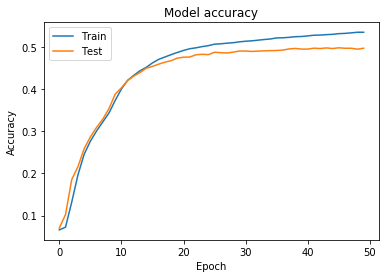

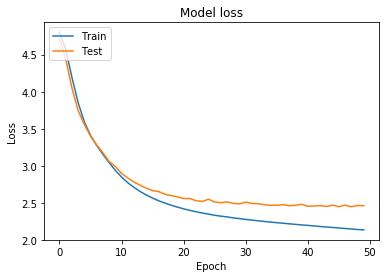

Training Time :  1110.8640849590302


In [205]:
# LSTM 32 32 32 0.49
import time
model_num =2

EPOCHS = 50
BATCH_SIZE = 128
LIMIT_RATE = 0.95

start = time.time()
model=train_model(model_num)
print("Training Time : ", time.time() - start)

one_hot_code:  (47510, 20, 421) (47510, 421)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_36 (Bidirectio (None, 20, 64)            116224    
_________________________________________________________________
bidirectional_37 (Bidirectio (None, 20, 64)            24832     
_________________________________________________________________
bidirectional_38 (Bidirectio (None, 64)                24832     
_________________________________________________________________
dense_10 (Dense)             (None, 421)               27365     
Total params: 193,253
Trainable params: 193,253
Non-trainable params: 0
_________________________________________________________________
Train on 35632 samples, validate on 11878 samples
Epoch 1/70
35632/35632 [==============================] - 57s 2ms/step - loss: 4.5066 - acc: 0.0924 - val_loss: 4.0440 - val_acc: 0.1257
Epoch 2/70
35632/35632 [============

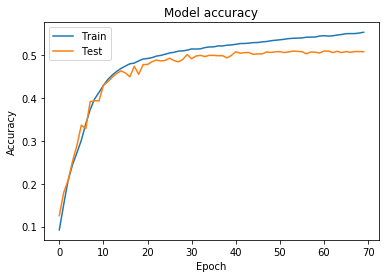

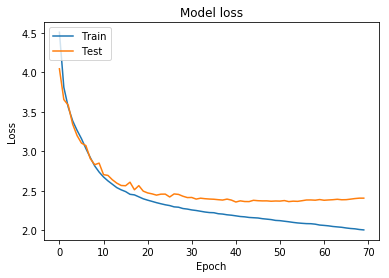

Training Time :  2677.286227941513


In [214]:
# BI 64 64 64 0.50-30ROUND
model_num =3

EPOCHS = 70
BATCH_SIZE = 128
LIMIT_RATE = 0.95

start = time.time()
model_easybi = train_model(model_num)
print("Training Time : ", time.time() - start)

one_hot_code:  (47510, 20, 421) (47510, 421)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_41 (Bidirectio (None, 20, 128)           248832    
_________________________________________________________________
bidirectional_42 (Bidirectio (None, 20, 128)           98816     
_________________________________________________________________
bidirectional_43 (Bidirectio (None, 256)               263168    
_________________________________________________________________
dense_12 (Dense)             (None, 421)               108197    
Total params: 719,013
Trainable params: 719,013
Non-trainable params: 0
_________________________________________________________________
Train on 35632 samples, validate on 11878 samples
Epoch 1/70
35632/35632 [==============================] - 95s 3ms/step - loss: 4.1538 - acc: 0.1421 - val_loss: 3.5897 - val_acc: 0.2076
Epoch 2/70
35632/35632 [============

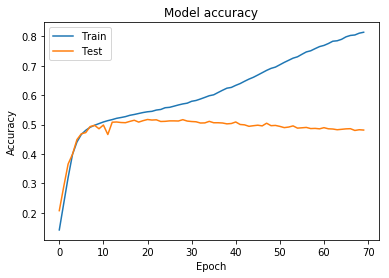

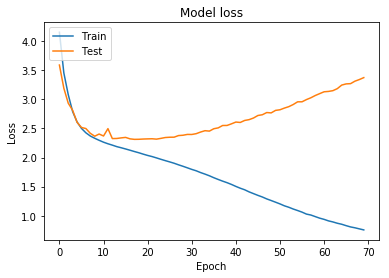

Training Time :  5424.537863254547


In [218]:
# BI 128 128 256 0.51-20 ROUNT
model_num =3

EPOCHS = 70
BATCH_SIZE = 128
LIMIT_RATE = 0.95

start = time.time()
model_easybi = train_model(model_num)
print("Training Time : ", time.time() - start)

one_hot_code:  (47510, 10, 421) (47510, 421)


/anaconda3/envs/tensorflow1/lib/python3.6/site-packages/ipykernel_launcher.py:87: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_35 (InputLayer)           (None, 10, 421)      0                                            
__________________________________________________________________________________________________
permute_28 (Permute)            (None, 421, 10)      0           input_35[0][0]                   
__________________________________________________________________________________________________
reshape_18 (Reshape)            (None, 421, 10)      0           permute_28[0][0]                 
__________________________________________________________________________________________________
dense_41 (Dense)                (None, 421, 10)      110         reshape_18[0][0]                 
__________________________________________________________________________________________________
permute_29

35632/35632 [==============================] - 55s 2ms/step - loss: 1.4632 - acc: 0.6287 - val_loss: 2.7120 - val_acc: 0.4975


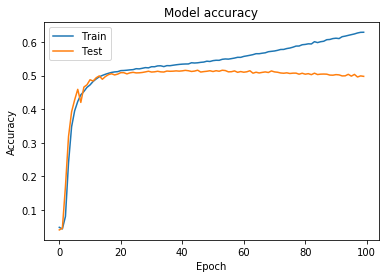

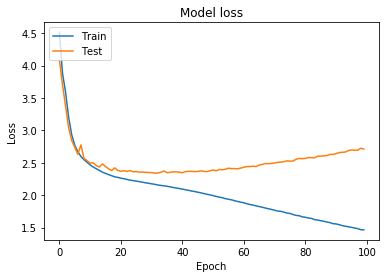

Training Time :  5596.645420789719


In [304]:
# LSTM 32 32 ATTEN-BEFORE 0.51 40 ROUND --20 dim
import time

model_num = 4

EPOCHS = 100
BATCH_SIZE = 128
LIMIT_RATE = 0.95

start = time.time()
model_atten_before = train_model(model_num)
print("Training Time : ", time.time() - start)



permute_29
10 421
----- activations -----
(1, 10, 421)
attention = [0.07192747 0.05040076 0.0526665  0.0754885  0.09473446 0.08261784
 0.04867875 0.08258602 0.13054496 0.31035474]
----- activations -----
(1, 10, 421)
attention = [0.05378035 0.042191   0.04106411 0.0957012  0.04091613 0.06051976
 0.05027625 0.05842238 0.26796666 0.28916216]
----- activations -----
(1, 10, 421)
attention = [0.06330896 0.0418314  0.04671763 0.06609359 0.0838689  0.07085762
 0.04292207 0.0763035  0.14284039 0.36525598]
----- activations -----
(1, 10, 421)
attention = [0.06557339 0.06251631 0.04790996 0.08003248 0.09041142 0.06624448
 0.0548884  0.08349254 0.12745225 0.32147875]
----- activations -----
(1, 10, 421)
attention = [0.080802   0.04485682 0.05887844 0.08530788 0.07884017 0.08478898
 0.05612875 0.08559188 0.14953347 0.2752716 ]
----- activations -----
(1, 10, 421)
attention = [0.06147994 0.04457229 0.04963887 0.08456928 0.09618485 0.05536035
 0.04652564 0.09151944 0.18469404 0.28545535]
----- acti

(1, 10, 421)
attention = [0.07121491 0.04247787 0.04908105 0.06764051 0.08182879 0.06329177
 0.0512477  0.08468872 0.13354355 0.35498512]
----- activations -----
(1, 10, 421)
attention = [0.06318574 0.04401932 0.04326729 0.06723038 0.09609781 0.06924198
 0.04762373 0.07465193 0.15591362 0.33876815]
----- activations -----
(1, 10, 421)
attention = [0.06191658 0.04202846 0.05462407 0.06321386 0.08258338 0.07508805
 0.04998884 0.09421453 0.13197702 0.3443652 ]
----- activations -----
(1, 10, 421)
attention = [0.06515233 0.04340291 0.05467482 0.07222198 0.10880458 0.07577503
 0.0597356  0.07574933 0.14387791 0.30060554]
----- activations -----
(1, 10, 421)
attention = [0.05036787 0.03411063 0.03576437 0.08309744 0.03934034 0.06250001
 0.04553636 0.05572682 0.28776377 0.30579245]
----- activations -----
(1, 10, 421)
attention = [0.06420357 0.04187715 0.04846567 0.06986971 0.07897672 0.07484116
 0.04052855 0.07809179 0.15369913 0.34944656]
----- activations -----
(1, 10, 421)
attention = [0.

(1, 10, 421)
attention = [0.05250539 0.0319347  0.04212565 0.09583811 0.04448899 0.06557877
 0.04025197 0.05590024 0.2657117  0.3056645 ]
----- activations -----
(1, 10, 421)
attention = [0.04381208 0.04246457 0.04967388 0.09398827 0.04043498 0.06493495
 0.04213331 0.05516528 0.27921572 0.28817695]
----- activations -----
(1, 10, 421)
attention = [0.05298039 0.03890207 0.0458016  0.09007285 0.0416947  0.06053614
 0.04378999 0.05847333 0.27718535 0.29056358]
----- activations -----
(1, 10, 421)
attention = [0.0440288  0.03634332 0.0389483  0.0886092  0.044773   0.07041211
 0.04353153 0.05132032 0.25976893 0.3222645 ]
----- activations -----
(1, 10, 421)
attention = [0.04820602 0.04015356 0.0415505  0.08752422 0.04328964 0.07355219
 0.05375481 0.06663445 0.30620316 0.23913144]
----- activations -----
(1, 10, 421)
attention = [0.05039793 0.04581371 0.04680827 0.08390227 0.04095471 0.07170375
 0.03996314 0.05478785 0.26149154 0.30417687]
----- activations -----
(1, 10, 421)
attention = [0.

(1, 10, 421)
attention = [0.0717563  0.0597946  0.05420972 0.08080626 0.08905388 0.06175816
 0.05437157 0.07991805 0.14219613 0.3061353 ]
----- activations -----
(1, 10, 421)
attention = [0.06433833 0.0426204  0.0427639  0.06800556 0.07843857 0.06210051
 0.05066911 0.07813478 0.12868321 0.3842456 ]
----- activations -----
(1, 10, 421)
attention = [0.05659214 0.04326846 0.04719231 0.09541152 0.03693389 0.08318286
 0.04481292 0.05290256 0.26316443 0.27653894]
----- activations -----
(1, 10, 421)
attention = [0.04361926 0.04057631 0.05054585 0.09263372 0.05036192 0.05988683
 0.04075846 0.06398565 0.26932204 0.28830993]
----- activations -----
(1, 10, 421)
attention = [0.06117992 0.04464496 0.06367718 0.07948001 0.07228181 0.07083619
 0.04725141 0.07308017 0.15027957 0.33728883]
----- activations -----
(1, 10, 421)
attention = [0.06374697 0.04137879 0.06100389 0.06332261 0.08555783 0.07145011
 0.05172217 0.08376685 0.14522877 0.33282202]
----- activations -----
(1, 10, 421)
attention = [0.

(1, 10, 421)
attention = [0.06785832 0.0512393  0.04664288 0.0773042  0.0886005  0.06992056
 0.05325865 0.08709074 0.13007268 0.32801217]
----- activations -----
(1, 10, 421)
attention = [0.05232394 0.02874486 0.03820108 0.0774494  0.04827854 0.06815013
 0.04487351 0.06268264 0.28430685 0.294989  ]
----- activations -----
(1, 10, 421)
attention = [0.06831095 0.05286011 0.05638845 0.06629804 0.09740178 0.07118367
 0.05230408 0.07900365 0.13045566 0.32579362]
----- activations -----
(1, 10, 421)
attention = [0.06654049 0.05151124 0.04989161 0.08379395 0.07582799 0.0710908
 0.05100682 0.08267252 0.14468992 0.3229747 ]
----- activations -----
(1, 10, 421)
attention = [0.04364846 0.0430267  0.04318722 0.08617189 0.04508738 0.0678672
 0.04247086 0.05020157 0.2781349  0.3002038 ]
----- activations -----
(1, 10, 421)
attention = [0.05911232 0.05287287 0.05346117 0.06930992 0.08375683 0.0805696
 0.04955778 0.07268965 0.14026555 0.33840427]
----- activations -----
(1, 10, 421)
attention = [0.035

(1, 10, 421)
attention = [0.05271767 0.04717167 0.04647725 0.10631566 0.04385608 0.0671629
 0.04273795 0.05194454 0.25706464 0.28455162]
----- activations -----
(1, 10, 421)
attention = [0.04832908 0.03372328 0.04365375 0.10375095 0.04002202 0.07183991
 0.04772829 0.04615904 0.27764693 0.28714675]
----- activations -----
(1, 10, 421)
attention = [0.04009244 0.04097117 0.04219998 0.08970477 0.0470706  0.07044955
 0.04874526 0.05759116 0.27436993 0.28880513]
----- activations -----
(1, 10, 421)
attention = [0.05608099 0.05215059 0.05167051 0.06348565 0.08267836 0.06566258
 0.05047159 0.07937927 0.15134893 0.34707156]
----- activations -----
(1, 10, 421)
attention = [0.04985676 0.03210354 0.03657747 0.08219646 0.04032601 0.06684254
 0.04012009 0.06493264 0.27331516 0.31372938]
----- activations -----
(1, 10, 421)
attention = [0.06651273 0.04614642 0.04578507 0.06145466 0.0948308  0.0805066
 0.05563295 0.07739037 0.14634158 0.32539877]
----- activations -----
(1, 10, 421)
attention = [0.04

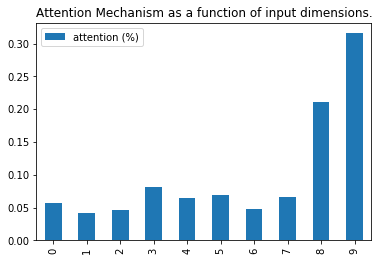

In [305]:
layer_name ="permute_29"
show_attention_weight(model_atten_before,layer_name)

one_hot_code:  (47510, 10, 421) (47510, 421)


/anaconda3/envs/tensorflow1/lib/python3.6/site-packages/ipykernel_launcher.py:106: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_36 (InputLayer)           (None, 10, 421)      0                                            
__________________________________________________________________________________________________
bidirectional_48 (Bidirectional (None, 10, 128)      248832      input_36[0][0]                   
__________________________________________________________________________________________________
dropout_17 (Dropout)            (None, 10, 128)      0           bidirectional_48[0][0]           
__________________________________________________________________________________________________
bidirectional_49 (Bidirectional (None, 10, 256)      263168      dropout_17[0][0]                 
__________________________________________________________________________________________________
permute_30

Epoch 40/100
35632/35632 [==============================] - 51s 1ms/step - loss: 1.7496 - acc: 0.5777 - val_loss: 2.3744 - val_acc: 0.5160
Epoch 41/100
35632/35632 [==============================] - 53s 2ms/step - loss: 1.7307 - acc: 0.5817 - val_loss: 2.3981 - val_acc: 0.5117
Epoch 42/100
35632/35632 [==============================] - 51s 1ms/step - loss: 1.7122 - acc: 0.5848 - val_loss: 2.4294 - val_acc: 0.5115
Epoch 43/100
35632/35632 [==============================] - 53s 1ms/step - loss: 1.6937 - acc: 0.5859 - val_loss: 2.4318 - val_acc: 0.5104
Epoch 44/100
35632/35632 [==============================] - 51s 1ms/step - loss: 1.6734 - acc: 0.5914 - val_loss: 2.4391 - val_acc: 0.5114
Epoch 45/100
35632/35632 [==============================] - 51s 1ms/step - loss: 1.6576 - acc: 0.5938 - val_loss: 2.4484 - val_acc: 0.5123
Epoch 46/100
35632/35632 [==============================] - 51s 1ms/step - loss: 1.6395 - acc: 0.5958 - val_loss: 2.4560 - val_acc: 0.5090
Epoch 47/100
35632/35632 [=

Epoch 99/100
35632/35632 [==============================] - 51s 1ms/step - loss: 1.0264 - acc: 0.7273 - val_loss: 3.0749 - val_acc: 0.4941
Epoch 100/100
35632/35632 [==============================] - 51s 1ms/step - loss: 1.0186 - acc: 0.7291 - val_loss: 3.0651 - val_acc: 0.4921


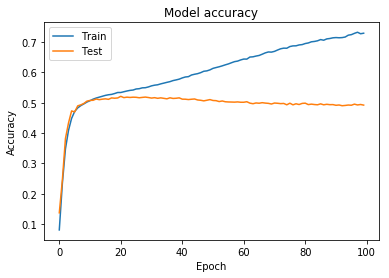

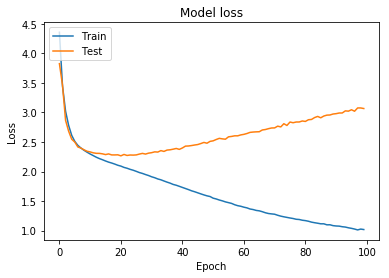

Training Time :  5200.823826313019


In [306]:
# LSTM 32 32 ATTEN-BAFTER 0.51 40 ROUND

model_num = 5

EPOCHS = 100
BATCH_SIZE = 128
LIMIT_RATE = 0.95

start = time.time()
model_atten_after = train_model(model_num)
print("Training Time : ", time.time() - start)

In [ ]:
以上正在跑  bilstm

permute_21
10 421
----- activations -----
(1, 10, 32)
attention = [0.05790377 0.04687244 0.04376164 0.03014818 0.08433226 0.08981209
 0.15888137 0.18843378 0.07008208 0.22977239]
----- activations -----
(1, 10, 32)
attention = [0.06889987 0.02790431 0.01387386 0.0205292  0.26766735 0.09134272
 0.14653136 0.11098915 0.10608177 0.14618042]
----- activations -----
(1, 10, 32)
attention = [0.03759393 0.03039296 0.02721332 0.01518397 0.18691109 0.0636671
 0.22677177 0.16225229 0.06160875 0.18840477]
----- activations -----
(1, 10, 32)
attention = [0.06645937 0.01788334 0.01997781 0.02302138 0.14397143 0.04539866
 0.34145543 0.14792636 0.06178494 0.1321213 ]
----- activations -----
(1, 10, 32)
attention = [0.02854375 0.03073012 0.10388058 0.05836294 0.08886462 0.0958239
 0.0843402  0.14595848 0.05465876 0.30883667]
----- activations -----
(1, 10, 32)
attention = [0.16861826 0.02103285 0.02431721 0.01442463 0.18681361 0.04266707
 0.0501755  0.07408172 0.02337922 0.3944899 ]
----- activations 

(1, 10, 32)
attention = [0.03347077 0.01774515 0.01100378 0.02701175 0.1571789  0.08941174
 0.20554551 0.13866143 0.15786636 0.1621046 ]
----- activations -----
(1, 10, 32)
attention = [0.07989027 0.04083881 0.04246065 0.02569881 0.1079435  0.0635785
 0.11871213 0.14790061 0.04643879 0.3265379 ]
----- activations -----
(1, 10, 32)
attention = [0.06782776 0.01659621 0.01202652 0.01404234 0.32543898 0.04085723
 0.05431227 0.17014506 0.08719084 0.2115628 ]
----- activations -----
(1, 10, 32)
attention = [0.10253975 0.01275337 0.01242288 0.01126041 0.3708561  0.03787906
 0.11302745 0.09295141 0.02648138 0.21982817]
----- activations -----
(1, 10, 32)
attention = [0.09807853 0.04080878 0.02551667 0.03440722 0.0499467  0.04073067
 0.11289515 0.11275074 0.0246204  0.46024513]
----- activations -----
(1, 10, 32)
attention = [0.00584691 0.00665732 0.01940277 0.00976053 0.156185   0.03377824
 0.20199879 0.03788791 0.02936478 0.49911773]
----- activations -----
(1, 10, 32)
attention = [0.045908  

(1, 10, 32)
attention = [0.0344981  0.06155979 0.01552043 0.01692734 0.14096814 0.1354126
 0.19414812 0.10987248 0.08615436 0.20493864]
----- activations -----
(1, 10, 32)
attention = [0.1329976  0.01195641 0.02039554 0.02417472 0.14130788 0.0614198
 0.08537615 0.09869871 0.05293806 0.3707351 ]
----- activations -----
(1, 10, 32)
attention = [0.0690227  0.02367728 0.02666076 0.03051418 0.14756933 0.09134483
 0.14686963 0.14930761 0.13450009 0.18053359]
----- activations -----
(1, 10, 32)
attention = [0.09478783 0.03374208 0.04144349 0.02802278 0.09330344 0.04989264
 0.13065168 0.11518976 0.04328826 0.36967802]
----- activations -----
(1, 10, 32)
attention = [0.1839849  0.0220417  0.01073696 0.00760626 0.09670985 0.02489979
 0.05380209 0.05942319 0.01113877 0.52965647]
----- activations -----
(1, 10, 32)
attention = [0.02232852 0.0121348  0.01621804 0.00576061 0.24486667 0.03366277
 0.26927596 0.11434573 0.16391727 0.11748961]
----- activations -----
(1, 10, 32)
attention = [0.08113872 

(1, 10, 32)
attention = [0.06863924 0.01627682 0.03064072 0.0301199  0.19513264 0.06967531
 0.18379909 0.09981495 0.05875085 0.24715045]
----- activations -----
(1, 10, 32)
attention = [0.05732007 0.02673381 0.06547801 0.02257672 0.19330034 0.04731113
 0.17032397 0.1915343  0.01899598 0.20642567]
----- activations -----
(1, 10, 32)
attention = [0.13564643 0.01325761 0.023712   0.01527838 0.18238243 0.07017919
 0.18911988 0.1452212  0.08232867 0.14287418]
----- activations -----
(1, 10, 32)
attention = [0.08695573 0.03355032 0.03645106 0.0040067  0.34695178 0.06417893
 0.07104057 0.12016865 0.07581179 0.16088447]
----- activations -----
(1, 10, 32)
attention = [0.02852784 0.03284003 0.03020852 0.01346935 0.12216149 0.05717772
 0.05798869 0.2750535  0.02972829 0.35284457]
----- activations -----
(1, 10, 32)
attention = [0.03031439 0.03159812 0.02191393 0.04635007 0.11107033 0.08809024
 0.16801372 0.13761763 0.20025922 0.16477233]
----- activations -----
(1, 10, 32)
attention = [0.083946 

(1, 10, 32)
attention = [0.0495859  0.02930894 0.03735135 0.01899385 0.1131671  0.06548246
 0.19580168 0.15304065 0.07857624 0.25869185]
----- activations -----
(1, 10, 32)
attention = [0.05536857 0.02133085 0.07732528 0.04650146 0.07430652 0.14253554
 0.12310266 0.09990282 0.05489483 0.3047315 ]
----- activations -----
(1, 10, 32)
attention = [0.06012046 0.01054105 0.03558115 0.0086707  0.22042327 0.03889933
 0.14314827 0.09781706 0.05669839 0.32810032]
----- activations -----
(1, 10, 32)
attention = [0.05499712 0.03215102 0.01831607 0.02777248 0.13947266 0.11219963
 0.2616238  0.14814605 0.06055822 0.14476293]
----- activations -----
(1, 10, 32)
attention = [0.02864502 0.02150733 0.02578315 0.0109774  0.16051859 0.04391829
 0.15826458 0.11759179 0.05028822 0.3825056 ]
----- activations -----
(1, 10, 32)
attention = [0.06217235 0.01807196 0.01781387 0.02101735 0.1561576  0.14076206
 0.24178213 0.12248652 0.09317961 0.12655655]
----- activations -----
(1, 10, 32)
attention = [0.0108282

(1, 10, 32)
attention = [0.08595537 0.04652    0.04410764 0.02703828 0.15515399 0.05660729
 0.19964793 0.14247558 0.10802783 0.13446607]
----- activations -----
(1, 10, 32)
attention = [0.15472624 0.04238155 0.02974378 0.02087736 0.12316631 0.06489183
 0.10242687 0.16103399 0.06542994 0.23532215]
----- activations -----
(1, 10, 32)
attention = [0.13065132 0.02090465 0.02451236 0.02047943 0.29057902 0.05226511
 0.15366054 0.08928095 0.12721741 0.09044918]
----- activations -----
(1, 10, 32)
attention = [0.09271706 0.01172408 0.03027209 0.04247977 0.1640799  0.03160975
 0.09197393 0.12993155 0.05697538 0.34823647]
----- activations -----
(1, 10, 32)
attention = [0.09923656 0.02683737 0.03391805 0.01798909 0.14487237 0.06982225
 0.18541524 0.12454839 0.07172237 0.22563833]
----- activations -----
(1, 10, 32)
attention = [0.03724465 0.05116427 0.01267443 0.04826145 0.07542507 0.08474687
 0.0815237  0.27440485 0.03489833 0.29965636]
----- activations -----
(1, 10, 32)
attention = [0.1347858

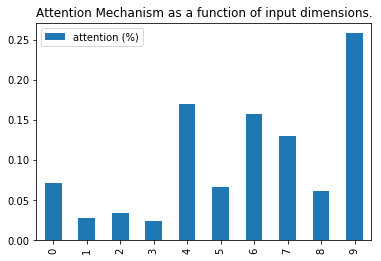

In [297]:
layer_name ="permute_31"
show_attention_weight(model_atten_after,layer_name)

one_hot_code:  (47510, 10, 421) (47510, 421)


/anaconda3/envs/tensorflow1/lib/python3.6/site-packages/ipykernel_launcher.py:127: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           (None, 10, 421)      0                                            
__________________________________________________________________________________________________
permute_32 (Permute)            (None, 421, 10)      0           input_37[0][0]                   
__________________________________________________________________________________________________
reshape_20 (Reshape)            (None, 421, 10)      0           permute_32[0][0]                 
__________________________________________________________________________________________________
dense_45 (Dense)                (None, 421, 10)      110         reshape_20[0][0]                 
__________________________________________________________________________________________________
permute_33

35632/35632 [==============================] - 45s 1ms/step - loss: 2.2302 - acc: 0.5179 - val_loss: 2.3232 - val_acc: 0.5158
Epoch 33/100
35632/35632 [==============================] - 44s 1ms/step - loss: 2.2263 - acc: 0.5180 - val_loss: 2.3191 - val_acc: 0.5188
Epoch 34/100
35632/35632 [==============================] - 45s 1ms/step - loss: 2.2213 - acc: 0.5195 - val_loss: 2.3395 - val_acc: 0.5146
Epoch 35/100
35632/35632 [==============================] - 45s 1ms/step - loss: 2.2188 - acc: 0.5186 - val_loss: 2.3095 - val_acc: 0.5205
Epoch 36/100
35632/35632 [==============================] - 45s 1ms/step - loss: 2.2142 - acc: 0.5198 - val_loss: 2.3110 - val_acc: 0.5210
Epoch 37/100
35632/35632 [==============================] - 45s 1ms/step - loss: 2.2091 - acc: 0.5215 - val_loss: 2.3134 - val_acc: 0.5199
Epoch 38/100
35632/35632 [==============================] - 44s 1ms/step - loss: 2.2046 - acc: 0.5223 - val_loss: 2.3228 - val_acc: 0.5173
Epoch 39/100
35632/35632 [==============

35632/35632 [==============================] - 45s 1ms/step - loss: 1.9940 - acc: 0.5430 - val_loss: 2.3588 - val_acc: 0.5228
Epoch 92/100
35632/35632 [==============================] - 45s 1ms/step - loss: 1.9898 - acc: 0.5444 - val_loss: 2.3566 - val_acc: 0.5253
Epoch 93/100
35632/35632 [==============================] - 45s 1ms/step - loss: 1.9876 - acc: 0.5431 - val_loss: 2.3548 - val_acc: 0.5268
Epoch 94/100
35632/35632 [==============================] - 45s 1ms/step - loss: 1.9845 - acc: 0.5441 - val_loss: 2.3512 - val_acc: 0.5223
Epoch 95/100
35632/35632 [==============================] - 47s 1ms/step - loss: 1.9830 - acc: 0.5443 - val_loss: 2.3519 - val_acc: 0.5260
Epoch 96/100
35632/35632 [==============================] - 44s 1ms/step - loss: 1.9729 - acc: 0.5454 - val_loss: 2.3565 - val_acc: 0.5253
Epoch 97/100
35632/35632 [==============================] - 45s 1ms/step - loss: 1.9729 - acc: 0.5443 - val_loss: 2.3639 - val_acc: 0.5256
Epoch 98/100
35632/35632 [==============

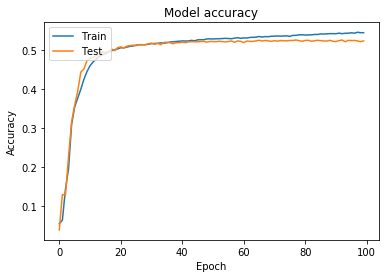

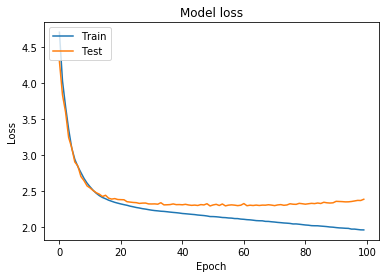

Training Time :  4527.273530006409


In [307]:
# LSTM 32 32 ATTEN-BAFTER 0.51 40 ROUND

model_num = 6

EPOCHS = 100
BATCH_SIZE = 128
LIMIT_RATE = 0.95

start = time.time()
model_atten_bo = train_model(model_num)
print("Training Time : ", time.time() - start)

permute_33
10 421
----- activations -----
(1, 10, 421)
attention = [0.08168016 0.03223383 0.04074342 0.05609347 0.15867792 0.03885482
 0.04082547 0.08237613 0.19838133 0.27013344]
----- activations -----
(1, 10, 421)
attention = [0.10018486 0.02800948 0.03437417 0.06372616 0.14735009 0.03700155
 0.04477466 0.08733612 0.19907196 0.25817096]
----- activations -----
(1, 10, 421)
attention = [0.08380508 0.02791753 0.03795427 0.06230736 0.1341483  0.03999764
 0.03996114 0.08483505 0.20676439 0.28230926]
----- activations -----
(1, 10, 421)
attention = [0.0792302  0.02548647 0.03793346 0.05484614 0.12371416 0.03646807
 0.0431266  0.08167088 0.21073301 0.306791  ]
----- activations -----
(1, 10, 421)
attention = [0.0862626  0.02563415 0.0398319  0.06209051 0.13454965 0.04068776
 0.04322693 0.08549064 0.2025974  0.2796285 ]
----- activations -----
(1, 10, 421)
attention = [0.08135265 0.02471319 0.03660455 0.05946061 0.14141484 0.03392072
 0.04228184 0.0802025  0.20857216 0.29147694]
----- acti

(1, 10, 421)
attention = [0.06863851 0.03628888 0.04169139 0.09091439 0.13758412 0.06053647
 0.0574151  0.08651533 0.0984479  0.32196793]
----- activations -----
(1, 10, 421)
attention = [0.10137822 0.03133325 0.03537379 0.06263739 0.12782797 0.03633877
 0.04406429 0.09254071 0.19294645 0.2755592 ]
----- activations -----
(1, 10, 421)
attention = [0.0689015  0.03550457 0.04175482 0.08564653 0.140352   0.05891333
 0.05070522 0.07843998 0.09458475 0.34519735]
----- activations -----
(1, 10, 421)
attention = [0.07225819 0.03641787 0.04434093 0.09640098 0.1336593  0.05935742
 0.05167945 0.08560762 0.09594379 0.32433447]
----- activations -----
(1, 10, 421)
attention = [0.07341962 0.03544476 0.04000989 0.10315858 0.13621058 0.06675372
 0.05170063 0.08555298 0.08620866 0.3215406 ]
----- activations -----
(1, 10, 421)
attention = [0.08283703 0.02688142 0.04473447 0.05496214 0.12546173 0.03658384
 0.04621124 0.08273454 0.20781282 0.29178077]
----- activations -----
(1, 10, 421)
attention = [0.

(1, 10, 421)
attention = [0.08164141 0.02794953 0.03955025 0.06251438 0.12801121 0.03743158
 0.04561101 0.08643671 0.20230961 0.2885443 ]
----- activations -----
(1, 10, 421)
attention = [0.07159523 0.03817159 0.04390729 0.08186886 0.16359651 0.06233526
 0.0463125  0.07695837 0.10364163 0.31161278]
----- activations -----
(1, 10, 421)
attention = [0.07162093 0.03593783 0.03696447 0.09355573 0.11630408 0.05985161
 0.06005849 0.08394418 0.09119285 0.35056984]
----- activations -----
(1, 10, 421)
attention = [0.08299176 0.02724363 0.04116413 0.0558841  0.12552716 0.03240161
 0.04304444 0.07501477 0.19016692 0.32656145]
----- activations -----
(1, 10, 421)
attention = [0.07215945 0.02716623 0.03252407 0.06181885 0.15347551 0.03434383
 0.0465328  0.08833383 0.17781636 0.30582905]
----- activations -----
(1, 10, 421)
attention = [0.07278726 0.03631627 0.03789552 0.07658231 0.13310178 0.05576189
 0.0522251  0.07503637 0.09083651 0.369457  ]
----- activations -----
(1, 10, 421)
attention = [0.

(1, 10, 421)
attention = [0.08283891 0.02450925 0.03889102 0.06293701 0.1390828  0.0349202
 0.04511655 0.08344394 0.20418389 0.2840764 ]
----- activations -----
(1, 10, 421)
attention = [0.05621025 0.03400885 0.03639349 0.09037384 0.14409775 0.05754283
 0.0535156  0.08144237 0.0906681  0.35574692]
----- activations -----
(1, 10, 421)
attention = [0.08178791 0.02609507 0.04118889 0.06108964 0.1563604  0.03716373
 0.04749504 0.08955892 0.19158484 0.26767552]
----- activations -----
(1, 10, 421)
attention = [0.06613197 0.03573135 0.04735706 0.08607633 0.13032795 0.05926961
 0.05332196 0.07559206 0.09047763 0.35571405]
----- activations -----
(1, 10, 421)
attention = [0.06941374 0.03614495 0.04596631 0.08738104 0.14123142 0.06368151
 0.06139762 0.08389719 0.09630625 0.31458   ]
----- activations -----
(1, 10, 421)
attention = [0.07706289 0.03685859 0.03999262 0.08784693 0.16437715 0.05873557
 0.05256646 0.07544777 0.08456815 0.32254383]
----- activations -----
(1, 10, 421)
attention = [0.0

(1, 10, 421)
attention = [0.06422773 0.03394855 0.03980171 0.09471663 0.13856421 0.06426178
 0.05484594 0.08227067 0.09808168 0.32928112]
----- activations -----
(1, 10, 421)
attention = [0.09425648 0.02650325 0.03371399 0.061023   0.14847668 0.0364455
 0.04745006 0.08244709 0.1918501  0.27783385]
----- activations -----
(1, 10, 421)
attention = [0.06823348 0.03509361 0.04312419 0.08654428 0.14976275 0.06304201
 0.05198787 0.07677612 0.09744857 0.32798716]
----- activations -----
(1, 10, 421)
attention = [0.10166659 0.02870716 0.03865416 0.0599538  0.13341865 0.03713411
 0.04287894 0.0890621  0.1954491  0.27307537]
----- activations -----
(1, 10, 421)
attention = [0.09261746 0.02947542 0.03704588 0.0623254  0.12411836 0.03449798
 0.04491616 0.09010358 0.2113693  0.27353042]
----- activations -----
(1, 10, 421)
attention = [0.06662066 0.03246467 0.04461918 0.08723298 0.16446131 0.05910038
 0.05496761 0.08174441 0.10409797 0.30469084]
----- activations -----
(1, 10, 421)
attention = [0.0

(1, 10, 421)
attention = [0.06494085 0.03401798 0.03516795 0.08677592 0.14134209 0.05805274
 0.05373881 0.07802988 0.08860738 0.35932642]
----- activations -----
(1, 10, 421)
attention = [0.08162683 0.0250532  0.03915803 0.05654404 0.12457734 0.03398155
 0.04418474 0.08342031 0.20833133 0.30312267]
----- activations -----
(1, 10, 421)
attention = [0.06692652 0.03411192 0.0464615  0.09362807 0.1257166  0.06178315
 0.04958997 0.07649995 0.09459879 0.3506835 ]
----- activations -----
(1, 10, 421)
attention = [0.08246165 0.02470082 0.03486961 0.06028505 0.17420834 0.03407123
 0.03711444 0.08552095 0.18117605 0.2855919 ]
----- activations -----
(1, 10, 421)
attention = [0.07618595 0.04141016 0.04766577 0.07691138 0.12634337 0.06076049
 0.05382255 0.07436198 0.10501731 0.33752102]
----- activations -----
(1, 10, 421)
attention = [0.09705278 0.0300872  0.04398945 0.06016682 0.11949216 0.03779159
 0.05349527 0.08740073 0.21907221 0.2514518 ]
----- activations -----
(1, 10, 421)
attention = [0.

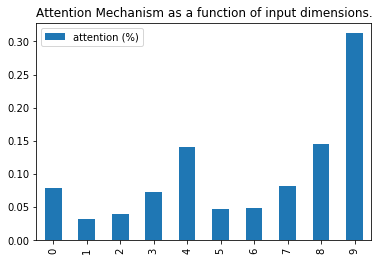

In [308]:
layer_name ="permute_33"
show_attention_weight(model_atten_bo,layer_name)

permute_35
10 421
----- activations -----
(1, 10, 128)
attention = [0.16869214 0.12656417 0.03520716 0.09486467 0.05898233 0.03881039
 0.04314759 0.05672286 0.09099974 0.28600895]
----- activations -----
(1, 10, 128)
attention = [0.11011767 0.13134333 0.04359713 0.08709981 0.06381848 0.04385192
 0.06078363 0.09613314 0.13319314 0.23006174]
----- activations -----
(1, 10, 128)
attention = [0.10456757 0.11976749 0.02502153 0.06779154 0.16907589 0.06971438
 0.12135981 0.07285717 0.06688783 0.18295676]
----- activations -----
(1, 10, 128)
attention = [0.15416455 0.10767859 0.02755972 0.09537147 0.10670516 0.06678422
 0.06759241 0.05733902 0.09068859 0.22611624]
----- activations -----
(1, 10, 128)
attention = [0.1716213  0.11394767 0.02661611 0.09352657 0.07995026 0.0358888
 0.04357296 0.05075292 0.07299718 0.31112623]
----- activations -----
(1, 10, 128)
attention = [0.14931905 0.06558744 0.03096191 0.07799985 0.136761   0.05915726
 0.05952358 0.05439839 0.08216292 0.2841286 ]
----- activ

(1, 10, 128)
attention = [0.14566359 0.09116643 0.02925395 0.0948635  0.09055157 0.03860332
 0.0501198  0.05314868 0.07759987 0.32902926]
----- activations -----
(1, 10, 128)
attention = [0.17712857 0.09036899 0.02182126 0.08384958 0.09976834 0.03828302
 0.04845984 0.05519933 0.08196935 0.30315173]
----- activations -----
(1, 10, 128)
attention = [0.10221861 0.10026507 0.02224022 0.07263228 0.19612947 0.09559745
 0.1261874  0.0581895  0.08045025 0.14608973]
----- activations -----
(1, 10, 128)
attention = [0.1414075  0.09569782 0.03456814 0.08926105 0.07439311 0.07517655
 0.10165437 0.07849317 0.09229402 0.21705425]
----- activations -----
(1, 10, 128)
attention = [0.1518936  0.13442968 0.02794837 0.08545958 0.06943862 0.04333616
 0.04394747 0.0665815  0.08326574 0.2936993 ]
----- activations -----
(1, 10, 128)
attention = [0.1745005  0.08006626 0.03118639 0.08595062 0.07927759 0.03928521
 0.04786791 0.06628913 0.07967869 0.31589773]
----- activations -----
(1, 10, 128)
attention = [0.

(1, 10, 128)
attention = [0.14737669 0.08392752 0.03372079 0.09824313 0.05620016 0.04206797
 0.05397838 0.07106173 0.09476849 0.31865513]
----- activations -----
(1, 10, 128)
attention = [0.19945237 0.07148072 0.02257187 0.0784352  0.0687599  0.03890389
 0.04720359 0.05828189 0.08537918 0.32953137]
----- activations -----
(1, 10, 128)
attention = [0.16237721 0.08206718 0.03600977 0.09557782 0.09302364 0.06168818
 0.06648415 0.05413499 0.09058003 0.258057  ]
----- activations -----
(1, 10, 128)
attention = [0.15366675 0.11380581 0.03378706 0.09700244 0.09938581 0.05036173
 0.07458042 0.07540388 0.11301085 0.18899524]
----- activations -----
(1, 10, 128)
attention = [0.1604709  0.06052043 0.02858088 0.0769624  0.09411798 0.05217245
 0.05589912 0.05686966 0.0974815  0.31692466]
----- activations -----
(1, 10, 128)
attention = [0.16979381 0.11512066 0.01844441 0.07518771 0.08870905 0.02890811
 0.03331185 0.05013024 0.0678049  0.35258925]
----- activations -----
(1, 10, 128)
attention = [0.

(1, 10, 128)
attention = [0.1333325  0.09404383 0.03686894 0.10651124 0.03645248 0.03757412
 0.04821155 0.08368877 0.0940438  0.3292728 ]
----- activations -----
(1, 10, 128)
attention = [0.15014732 0.11357041 0.02678767 0.09146155 0.08139215 0.04622206
 0.05032904 0.04982555 0.07599886 0.31426537]
----- activations -----
(1, 10, 128)
attention = [0.10040186 0.11207163 0.02796708 0.07867151 0.11898644 0.07985515
 0.12736946 0.05727177 0.08009718 0.21730791]
----- activations -----
(1, 10, 128)
attention = [0.13562313 0.10840844 0.02968454 0.08471739 0.06978893 0.06041043
 0.07785027 0.07960425 0.1094888  0.24442382]
----- activations -----
(1, 10, 128)
attention = [0.13429883 0.06583402 0.02661849 0.07366388 0.18356861 0.06678382
 0.06946096 0.04987697 0.09287579 0.2370186 ]
----- activations -----
(1, 10, 128)
attention = [0.0987677  0.08727878 0.04565469 0.0834381  0.09787977 0.06006797
 0.07438431 0.08458693 0.12943777 0.23850396]
----- activations -----
(1, 10, 128)
attention = [0.

(1, 10, 128)
attention = [0.19928575 0.08982242 0.02851244 0.09184301 0.06362627 0.03312034
 0.04249049 0.06143115 0.08669928 0.30316883]
----- activations -----
(1, 10, 128)
attention = [0.12263436 0.09339461 0.02790676 0.07661664 0.13014367 0.05608862
 0.09270287 0.05234732 0.08345194 0.26471323]
----- activations -----
(1, 10, 128)
attention = [0.1422768  0.09868993 0.02564466 0.07681751 0.103912   0.0493533
 0.08372228 0.05754633 0.08642929 0.2756079 ]
----- activations -----
(1, 10, 128)
attention = [0.17694417 0.0956599  0.02677406 0.08810452 0.09135997 0.0513902
 0.06916901 0.05411544 0.08273227 0.2637505 ]
----- activations -----
(1, 10, 128)
attention = [0.15115444 0.09582509 0.02576633 0.09410928 0.09856337 0.0435078
 0.06329741 0.05184941 0.07971511 0.29621178]
----- activations -----
(1, 10, 128)
attention = [0.14058864 0.14828272 0.02187408 0.09326118 0.10526189 0.0483542
 0.06143776 0.05768524 0.07839229 0.24486202]
----- activations -----
(1, 10, 128)
attention = [0.1397

(1, 10, 128)
attention = [0.17040055 0.1009226  0.02740199 0.09135643 0.07803028 0.04796172
 0.05970256 0.05076487 0.102502   0.270957  ]
----- activations -----
(1, 10, 128)
attention = [0.17450197 0.0995722  0.02931633 0.08604318 0.07247239 0.05010408
 0.07547243 0.07090801 0.08791476 0.25369465]
----- activations -----
(1, 10, 128)
attention = [0.17500207 0.08892735 0.03137903 0.09636393 0.07951783 0.04299557
 0.04470506 0.05492431 0.08841623 0.29776862]
----- activations -----
(1, 10, 128)
attention = [0.11874298 0.15535246 0.03900422 0.09436458 0.04400304 0.04811703
 0.06188228 0.07776286 0.08695547 0.2738151 ]
----- activations -----
(1, 10, 128)
attention = [0.16545773 0.06528861 0.02437164 0.07441686 0.085573   0.03211613
 0.03590894 0.08197267 0.13893299 0.29596144]
----- activations -----
(1, 10, 128)
attention = [0.14407009 0.10197321 0.03601231 0.08570065 0.04825173 0.03971897
 0.04987058 0.07484543 0.12075682 0.29880017]
----- activations -----
(1, 10, 128)
attention = [0.

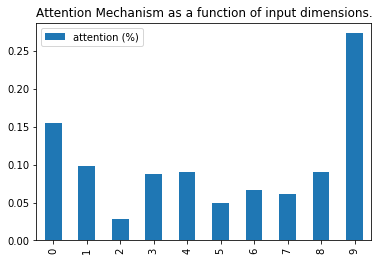

In [309]:
layer_name ="permute_35"
show_attention_weight(model_atten_bo,layer_name)

one_hot_code:  (47510, 10, 421) (47510, 421)


/anaconda3/envs/tensorflow1/lib/python3.6/site-packages/ipykernel_launcher.py:87: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_41 (InputLayer)           (None, 10, 421)      0                                            
__________________________________________________________________________________________________
permute_42 (Permute)            (None, 421, 10)      0           input_41[0][0]                   
__________________________________________________________________________________________________
reshape_25 (Reshape)            (None, 421, 10)      0           permute_42[0][0]                 
__________________________________________________________________________________________________
dense_53 (Dense)                (None, 421, 10)      110         reshape_25[0][0]                 
__________________________________________________________________________________________________
permute_43

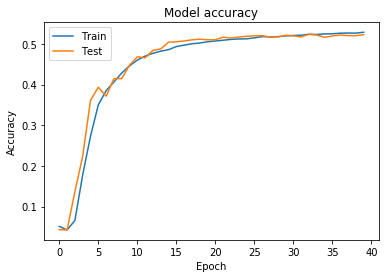

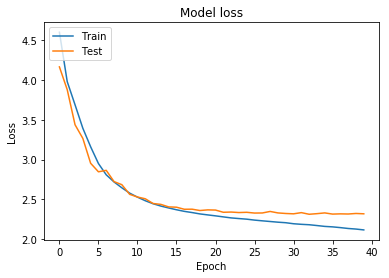

Training Time :  2525.4601571559906


In [412]:
import time

model_num = 4

EPOCHS = 40
BATCH_SIZE = 128
LIMIT_RATE = 0.95

start = time.time()
model_atten_before_try,test_data = train_model(model_num)
print("Training Time : ", time.time() - start)



##  save models

# prediction

In [425]:


def predict_presion(model,test_data):
    count_right = 0
    count_in3 = 0
    count_in5 = 0
    count_in10 = 0
    prediction=[]
    
    
    test_x = test_data[0]
    test_y = test_data[1]
    print ("len of test data:",len(test_x))
    
    for indx in range(len(test_x)):
        item = test_x[indx]
        c = Counter()
        pred =model.predict(np.array([item]))
        prediction.append(pred)
        for med_indx in range(len(pred[0])):
            c[med_indx]=pred[0][med_indx]
    
        y_indx =np.argwhere(test_y[indx] == 1)
    
        if y_indx in  [x[0] for x in c.most_common(10)]:
            count_in10+=1
            if y_indx in  [x[0] for x in c.most_common(5)]:
                count_in5+=1
                if y_indx in  [x[0] for x in c.most_common(3)]:
                    count_in3+=1
                    if y_indx in  [x[0] for x in c.most_common(1)]:
                        count_right +=1
    
    print("correct: ",count_right, "odd: ", count_right/len(test_x))
    print("correct in3 : ",count_in3, "odd: ", count_in3/len(test_x))
    print("correct in5 : ",count_in5, "odd: ", count_in5/len(test_x))
    print("correct in10 : ",count_in10, "odd: ", count_in10/len(test_x))
    return 

In [426]:
prediction = predict_presion(model_atten_before_try,test_data)

len of test data: 2000
correct:  1068 odd:  0.534
correct in3 :  1240 odd:  0.62
correct in5 :  1327 odd:  0.6635
correct in10 :  1473 odd:  0.7365


one_hot_code:  (47510, 10, 421) (47510, 421)


/anaconda3/envs/tensorflow1/lib/python3.6/site-packages/ipykernel_launcher.py:106: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_42 (InputLayer)           (None, 10, 421)      0                                            
__________________________________________________________________________________________________
bidirectional_59 (Bidirectional (None, 10, 128)      248832      input_42[0][0]                   
__________________________________________________________________________________________________
dropout_22 (Dropout)            (None, 10, 128)      0           bidirectional_59[0][0]           
__________________________________________________________________________________________________
bidirectional_60 (Bidirectional (None, 10, 256)      263168      dropout_22[0][0]                 
__________________________________________________________________________________________________
permute_44

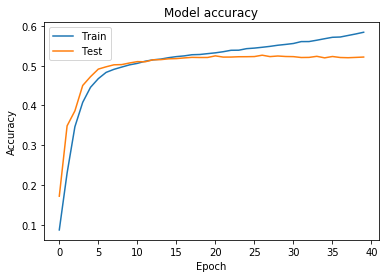

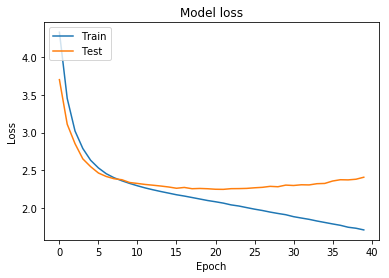

Training Time :  2021.2439200878143


In [427]:
import time

model_num = 5

EPOCHS = 40
BATCH_SIZE = 128
LIMIT_RATE = 0.95

start = time.time()
model_atten_after_try,test_data_2 = train_model(model_num)
print("Training Time : ", time.time() - start)

In [351]:
t=875
x_test= np.array([encoded_X[t]])
pred =model_atten_before.predict(x_test)

c = Counter()
for indx in range(len(pred[0])):
    c[indx]=pred[0][indx]
print(c.most_common(5))

encoded_Y[t]
print(np.argwhere(encoded_Y[t] == 1))
   

[(111, 0.8251349), (226, 0.5856255), (346, 0.4586122), (172, 0.42354608), (104, 0.38386366)]
[[111]]


# validation
* F1 SCORE
* AUC SCORE

In [ ]:
# F1 score